In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_path = "/content/gdrive/MyDrive/Tensorflow_and_other_tools/Dataset/Chest/NewFolder/chest_xray/train/NORMAL/"
test_path = "/content/gdrive/MyDrive/Tensorflow_and_other_tools/Dataset/Chest/NewFolder/chest_xray/test/NORMAL/"

train = []
for filename in os.listdir(train_path):
    if filename.endswith(".jpeg"):
        img = image.load_img(train_path+filename, target_size=(128, 128))
        train.append(image.img_to_array(img))
train = np.array(train)

test = []
for filename in os.listdir(test_path):
    if filename.endswith(".jpeg"):
        img = image.load_img(test_path+filename, target_size=(128, 128))
        test.append(image.img_to_array(img))
test = np.array(test)


In [ ]:
print("train", train.shape)
print("test", test.shape)

train (1341, 128, 128, 3)
test (234, 128, 128, 3)


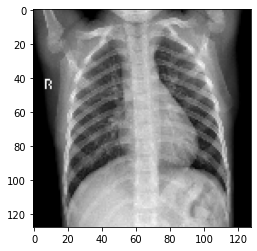

In [ ]:
plt.imshow(image.array_to_img(train[0]))

In [ ]:
def show_data(X, n=10, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

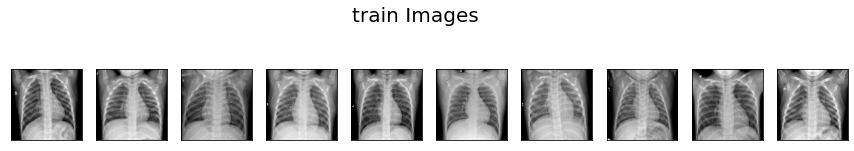

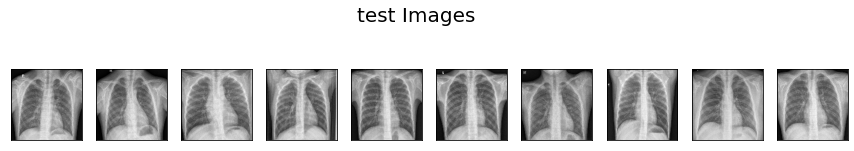

In [ ]:
show_data(train, title="train Images")
show_data(test, title="test Images")

In [ ]:
train = train/ 255
test = test / 255


In [ ]:
# The encoding process
input_img = Input(shape=(128, 128, 3))

x = Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
# kernel_size: Specifying the height and width of the 2D convolution window.
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters =64, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)


In [ ]:
# The decoding process

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
output_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
AE = Model(input_img, output_layer)

AE.compile(optimizer='Adam', loss='binary_crossentropy')
AE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928 

In [ ]:
AE.fit(train, train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(test, test))

Epoch 1/50
42/42 [==============================] - 20s 151ms/step - loss: 0.6314 - val_loss: 0.5704
Epoch 2/50
42/42 [==============================] - 4s 93ms/step - loss: 0.5630 - val_loss: 0.5627
Epoch 3/50
42/42 [==============================] - 4s 94ms/step - loss: 0.5578 - val_loss: 0.5597
Epoch 4/50
42/42 [==============================] - 4s 93ms/step - loss: 0.5562 - val_loss: 0.5584
Epoch 5/50
42/42 [==============================] - 4s 93ms/step - loss: 0.5578 - val_loss: 0.5595
Epoch 6/50
42/42 [==============================] - 4s 94ms/step - loss: 0.5547 - val_loss: 0.5572
Epoch 7/50
42/42 [==============================] - 4s 93ms/step - loss: 0.5535 - val_loss: 0.5567
Epoch 8/50
42/42 [==============================] - 4s 93ms/step - loss: 0.5532 - val_loss: 0.5562
Epoch 9/50
42/42 [==============================] - 4s 93ms/step - loss: 0.5525 - val_loss: 0.5558
Epoch 10/50
42/42 [==============================] - 4s 93ms/step - loss: 0.5524 - val_loss: 0.5556
Epoch 1

In [ ]:
reconstructed_cats = AE.predict(test)

In [ ]:
import numpy as np
from math import log10, sqrt
mse = np.mean((test[6] - reconstructed_cats[6]) ** 2)
max_pixel = 255.0
psnr = 20 * log10(max_pixel / sqrt(mse))
print(psnr)

77.34558456376702


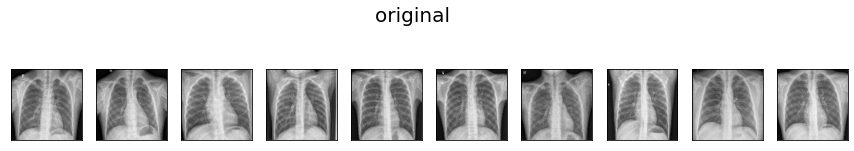

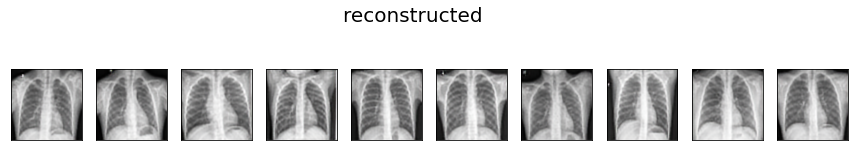

In [ ]:
show_data(test, title="original ")
show_data(reconstructed_cats, title="reconstructed ")